# K-means clustering

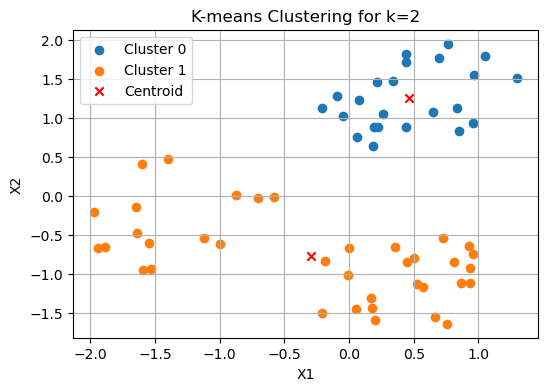

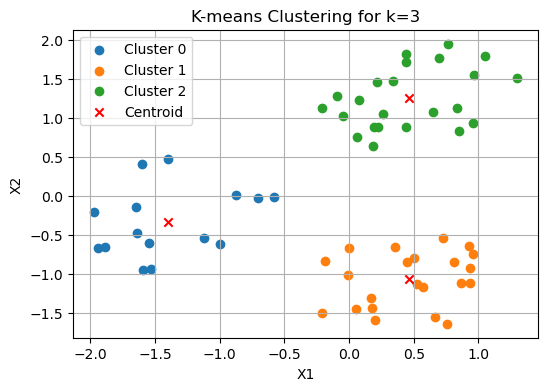

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("kmeans.csv")

X = data[['x1', 'x2']].values
X = (X-np.mean(X))/np.std(X)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def k_means(X, k, max_iter=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iter):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.array([[euclidean_distance(x, c) for c in centroids] for x in X]), axis=1)
        
        # Update centroids based on the mean of data points assigned to each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids


labels_k2, centroids_k2 = k_means(X, k=2)
labels_k3, centroids_k3 = k_means(X, k=3)

# Plot for k=2
plt.figure(figsize=(6, 4))
for label in np.unique(labels_k2):
    plt.scatter(X[labels_k2 == label, 0], X[labels_k2 == label, 1], label=f'Cluster {label}')
plt.scatter(centroids_k2[:, 0], centroids_k2[:, 1], marker='x', color='red', label='Centroid')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering for k=2')
plt.legend()
plt.grid(True)
plt.show()

# Plot for k=3
plt.figure(figsize=(6, 4))
for label in np.unique(labels_k3):
    plt.scatter(X[labels_k3 == label, 0], X[labels_k3 == label, 1], label=f'Cluster {label}')
plt.scatter(centroids_k3[:, 0], centroids_k3[:, 1], marker='x', color='red', label='Centroid')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering for k=3')
plt.legend()
plt.grid(True)
plt.show()
